In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Load the Auto dataset in a DataFrame using Pandas

In [2]:
data = pd.read_csv('data/auto-dataset.csv')
print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

### 1. Scatterplots between features

Text(0.5, 1.0, 'Scatter Plot of mpg vs weight')

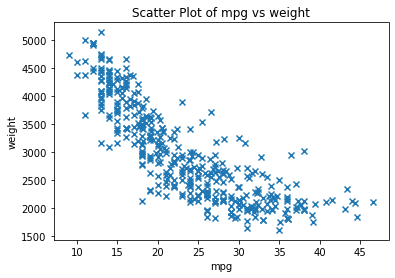

In [3]:
feat1 = data['mpg']
feat2 = data['weight']
plt.figure()
plt.scatter(feat1, feat2, marker='x')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('Scatter Plot of mpg vs weight')

#Similarly add scatter plots for every pair of features

In [4]:
# A scatterplot function which is used to find  the scatterplot between two variables
def scatterplotter(xvalue, yvalue):
    feat1 = data[xvalue]
    feat2 = data[yvalue]
    plt.figure()
    plt.scatter(feat1, feat2, marker='x')
    plt.xlabel(xvalue)
    plt.ylabel(yvalue)
    plt.title('Scatter Plot of '+str(xvalue)+' vs '+str(yvalue)+'')

<ipython-input-4-217196216d77>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


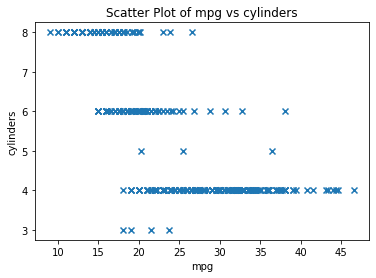

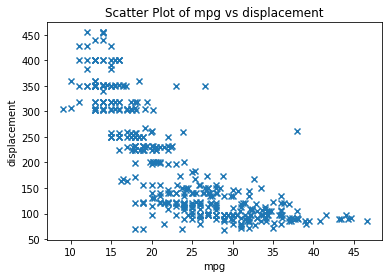

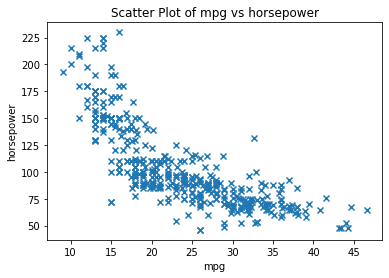

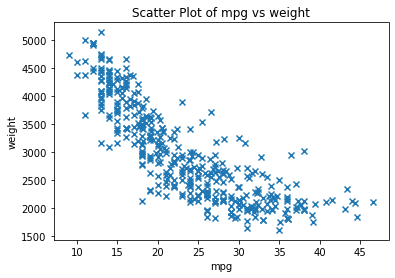

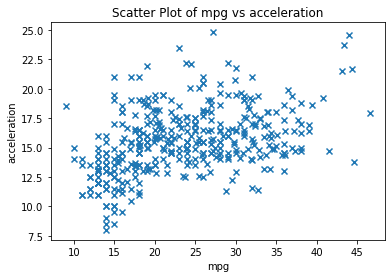

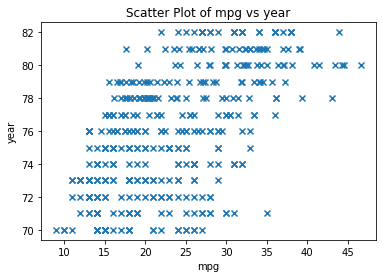

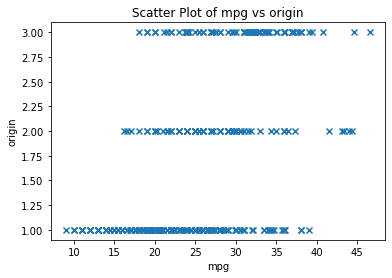

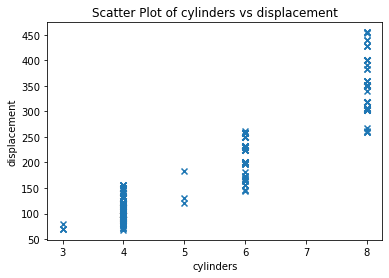

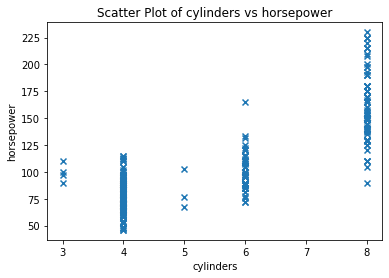

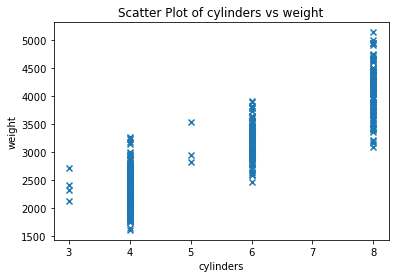

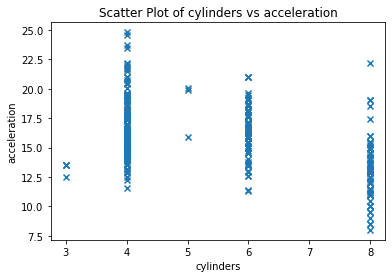

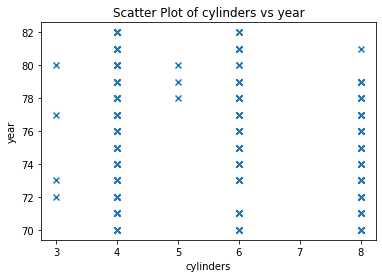

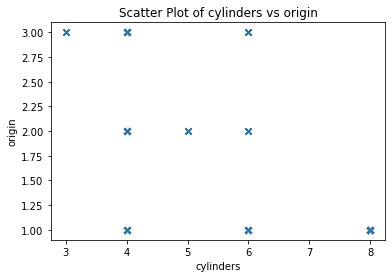

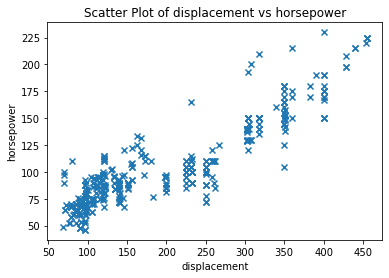

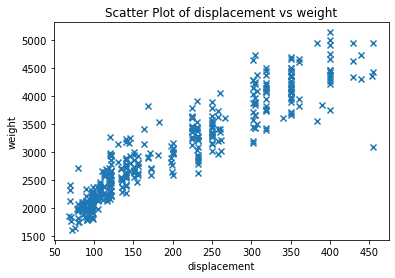

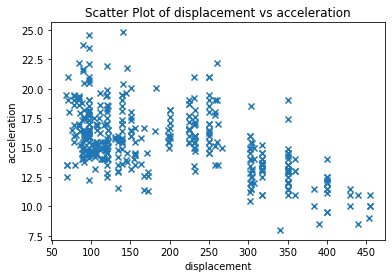

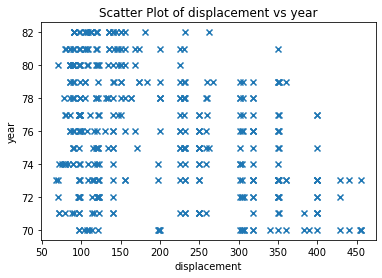

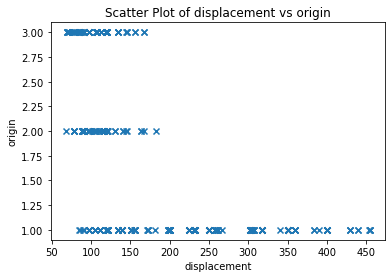

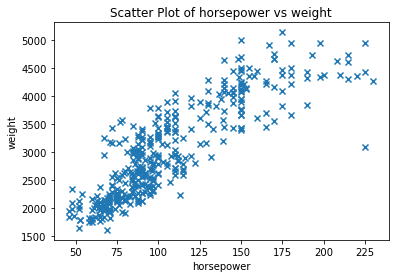

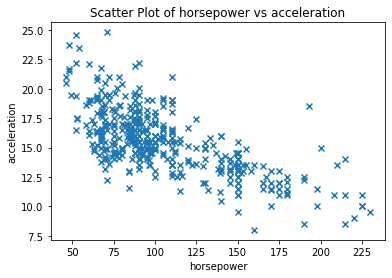

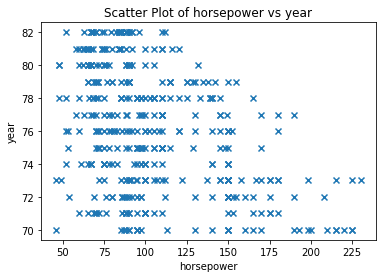

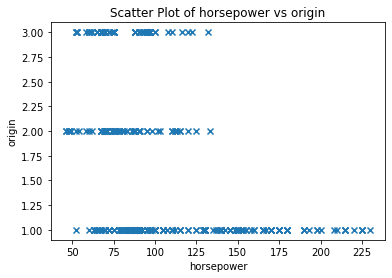

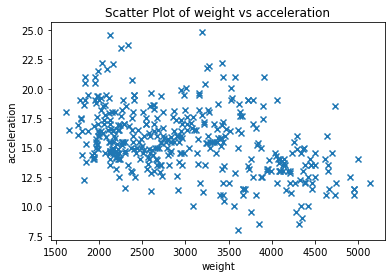

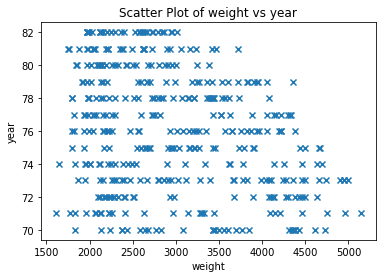

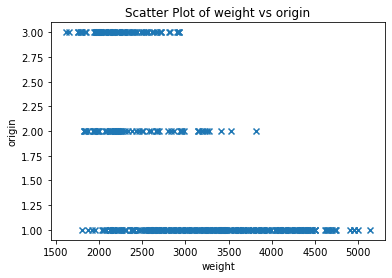

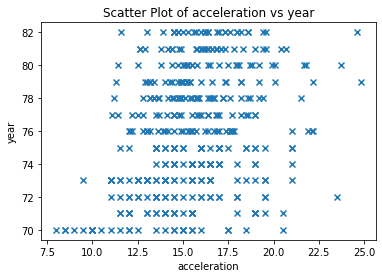

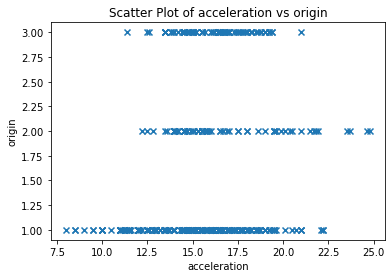

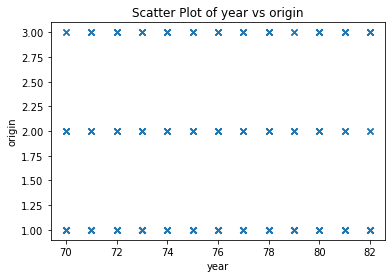

In [5]:
# Ploting the scatterplot between all pairs of variables

features= ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

for i in range (len(features)):
    for j in range (len(features)):
        if i<j:
            scatterplotter(features[i], features[j])

### 2. Correlation

In [6]:
# Use np corrcoef to observe the correlation between predictors

# Defining a np corrcoef function

def correlationfun(xvalue, yvalue):
    correlation = np.corrcoef(data[xvalue],data[yvalue])[0][1]
    return(correlation)
    

In [7]:

# Finding the correlation between all predictors and and from that evaluating the predictors with the highest correlation 
# and highest anti correlation

features= ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
correlation_matrix= []
maxi=-1
highest=-1
lowest = 1
for i in range (len(features)):
    for j in range (len(features)):
        if i<j:
            correlation_matrix.append(correlationfun(features[i], features[j]))
            hi= correlationfun(features[i], features[j])
            if highest<hi:
                highest= hi
                maxix=i
                maxiy=j
            if lowest>hi:
                lowest= hi
                lowix=i
                lowiy=j

print('the highest correlations is for ' +str(features[maxix])+ ' vs ' +str(features[maxiy])+'and the correlation is ' +str(highest)+'')
print('the highest anti-correlations is for ' +str(features[lowix])+ ' vs ' +str(features[lowiy])+'and the correlation is ' +str(lowest)+'')


            
        

the highest correlations is for cylinders vs displacementand the correlation is 0.950823300827781
the highest anti-correlations is for mpg vs weightand the correlation is -0.8322442148315753


### 3. Linear Regression

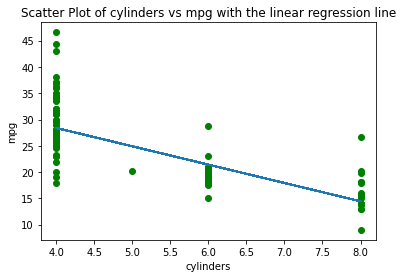

Score: 0.6143435277241279


In [9]:
# Linear regression 
linear_model = LinearRegression()

y = np.array(data['mpg'])
x = np.array(data['cylinders'])

# splitting data into test and training data
x_train, x_test, y_train, y_test= train_test_split(x,y)

#performing the fit

x_train_in_shape= x_train.reshape(-1, 1)
linear_model.fit(x_train_in_shape,y_train)
regression_function= linear_model.predict(x_test.reshape(-1,1))
plt.plot(x_test, regression_function)
plt.scatter(x_test, y_test, color='g')
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.title('Scatter Plot of cylinders vs mpg with the linear regression line')
plt.show()


# Caluculating the Score
print('Score:',linear_model.score(x_train_in_shape,y_train))


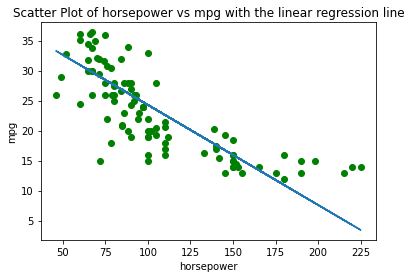

Score: 0.6078505332292813


In [18]:

linear_model = LinearRegression()

y = np.array(data['mpg'])
x = np.array(data['horsepower'])
# splitting data into test and training data


x_train, x_test, y_train, y_test= train_test_split(x,y)

#performing the fit


x_train_in_shape= x_train.reshape(-1, 1)
linear_model.fit(x_train_in_shape,y_train)
regression_function= linear_model.predict(x_test.reshape(-1,1))
plt.plot(x_test, regression_function)
plt.scatter(x_test, y_test, color='g')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('Scatter Plot of horsepower vs mpg with the linear regression line')
plt.show()

# caluculating the Score

print('Score:',linear_model.score(x_train_in_shape,y_train))


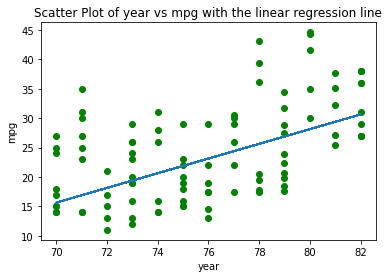

Score: 0.3562607098019921


In [24]:

linear_model = LinearRegression()

y = np.array(data['mpg'])
x = np.array(data['year'])

# splitting data into test and training data


x_train, x_test, y_train, y_test= train_test_split(x,y)

#performing the fit

x_train_in_shape= x_train.reshape(-1, 1)
linear_model.fit(x_train_in_shape,y_train)
regression_function= linear_model.predict(x_test.reshape(-1,1))
plt.plot(x_test, regression_function)
plt.scatter(x_test, y_test, color='g')
plt.xlabel('year')
plt.ylabel('mpg')
plt.title('Scatter Plot of year vs mpg with the linear regression line')
plt.show()


# caluculating the Score

print('Score:',linear_model.score(x_train_in_shape,y_train))


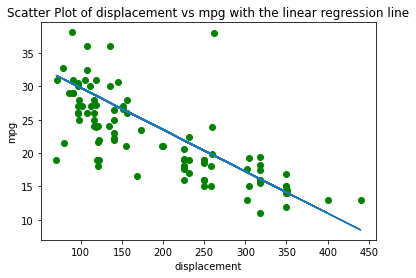

Score: 0.674993733939973


In [26]:

linear_model = LinearRegression()

y = np.array(data['mpg'])
x = np.array(data['displacement'])

# splitting data into test and training data


x_train, x_test, y_train, y_test= train_test_split(x,y)

#performing the fit

x_train_in_shape= x_train.reshape(-1, 1)
linear_model.fit(x_train_in_shape,y_train)
regression_function= linear_model.predict(x_test.reshape(-1,1))
plt.plot(x_test, regression_function)
plt.scatter(x_test, y_test, color='g')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.title('Scatter Plot of displacement vs mpg with the linear regression line')
plt.show()


# caluculating the Score

print('Score:',linear_model.score(x_train_in_shape,y_train))


In [27]:
from scipy import stats
print('slope',"\t\t\t", 'intercept',"\t\t\t", 'r_value',"\t\t", 'p_value',"\t\t", 'std_err')
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(data['cylinders'], data['mpg'])
print(slope1,"\t", intercept1,"\t", r_value1,"\t", p_value1,"\t", std_err1)

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(data['displacement'], data['mpg'])
print(slope2,"\t", intercept2,"\t", r_value2,"\t", p_value2, "\t",std_err2)

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(data['horsepower'], data['mpg'])
print(slope3,"\t", intercept3,"\t", r_value3,"\t", p_value3,"\t\t", std_err3)

slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(data['year'], data['mpg'])
print(slope4,"\t", intercept4,"\t", r_value4,"\t", p_value4,"\t", std_err4)


slope 			 intercept 			 r_value 		 p_value 		 std_err
-3.558078367621495 	 42.915505353439045 	 -0.7776175081260215 	 1.3113836370998321e-80 	 0.145675538207794
-0.06005142781220625 	 35.12063593840391 	 -0.8051269467104579 	 1.6606418277975981e-90 	 0.002240043446219372
-0.15784473335365348 	 39.93586102117045 	 -0.7784267838977758 	 7.031989029405463e-81 		 0.006445500517685034
1.2300354634480308 	 -70.01167409014325 	 0.5805409660907855 	 1.0757935564158799e-36 	 0.08735748304255504


In [28]:
# Fit the linear regression on mpg for the other features: cylinder, horsepower, year and displacement

### 4. Multiple regression

In [30]:
import numpy

#Multiple Linear Regression
#Create a 2D matrix with each column representing all features
#Look up np.concatenate or np.stack
from sklearn import linear_model

multiple_X=data[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
multiple_Y=data['mpg']
multiple_X=multiple_X.to_numpy()
multiple_Y=multiple_Y.to_numpy()

model = LinearRegression().fit(multiple_X, multiple_Y)
r_sq = model.score(multiple_X, multiple_Y)
print('Multiple regression Score:',r_sq)
#Print the predictions of the your fitted model and the weights of Linear Regression (look at the function get_params())
print('\n------------------------------------------------')

y_pred = model.predict(multiple_X)
print(f"Predicted Response of multiple regression:\n\n{y_pred}")

print('\n------------------------------------------------')

print('Model Parameters:',model.get_params())

dff=pd.DataFrame(model.coef_)

#dff=pd.DataFrame(numpy.transpose(model.coef_))
dff.columns=['Weights']
dff.index = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
print('\nWeights of the multiple linear regression:\n\n',dff)



Multiple regression Score: 0.8214780764810597

------------------------------------------------
Predicted Response of multiple regression:

[15.00095865 13.99929917 15.24044696 15.06190592 14.96717762 10.69562338
 10.6553509  10.69318951 10.21140958 13.11319398 15.29186157 14.14690266
 14.64696189 18.88015369 24.13062472 19.03847473 19.40643664 20.88068005
 25.45738302 27.13648841 21.03963303 22.25408365 22.7074409  23.25050717
 20.3005362   7.58306997  8.41074023  8.30037285  6.44696729 26.20815569
 23.39053912 25.73308381 21.46783861 16.23364804 17.52793963 17.90615253
 17.43525382 11.44975337 10.58385513 12.14999889 11.87950268  6.98211816
  8.88321853  6.24768971 19.73241559 23.0454129  17.79193175 18.88084577
 23.26421626 25.13116053 25.49443983 25.22718096 28.75457004 29.66193221
 27.53555535 25.15803406 26.28101808 24.47954013 26.03152794 23.5313529
 24.17758427 11.77971323 11.88636515 12.41807558 13.02233473 14.97586698
 10.21781246 10.59400653 10.80705681 11.4328463  25.387177

In [31]:
import statsmodels.api as sm

reg = sm.OLS(multiple_Y, multiple_X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                        0.00
Time:                        18:09:52   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7055      0.323     -2.181      0.030      -1.341      -0.070
x2             0.0219      0.008      2.871      0.004       0.007       0.037
x3            -0.0396      0.013     -3.147      0.002      -0.064      -0.015
x4            -0.0060      0.001     -9.258      0.000      -0.007      -0.005
x5            -0.0796      0.090     -0.881      0.379      -0.257       0.098
x6             0.5836      0.024     24.150      0.000       0.536       0.631
x7             1.3100      0.281      4.663      0.000       0.758       1.862
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

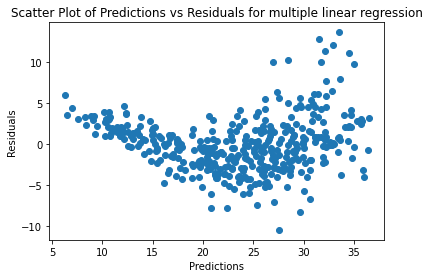

In [32]:
#Make a scatter plot of the residual vs the predictions of your linear regression model


plt.scatter(y_pred,reg.resid)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Predictions vs Residuals for multiple linear regression')
plt.show()